In [2]:
from ultralytics import YOLO


image 1/1 /Users/neesergparajuli/pill_countv2/my_image.jpg: 640x480 19 pills, 110.0ms
Speed: 3.8ms preprocess, 110.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


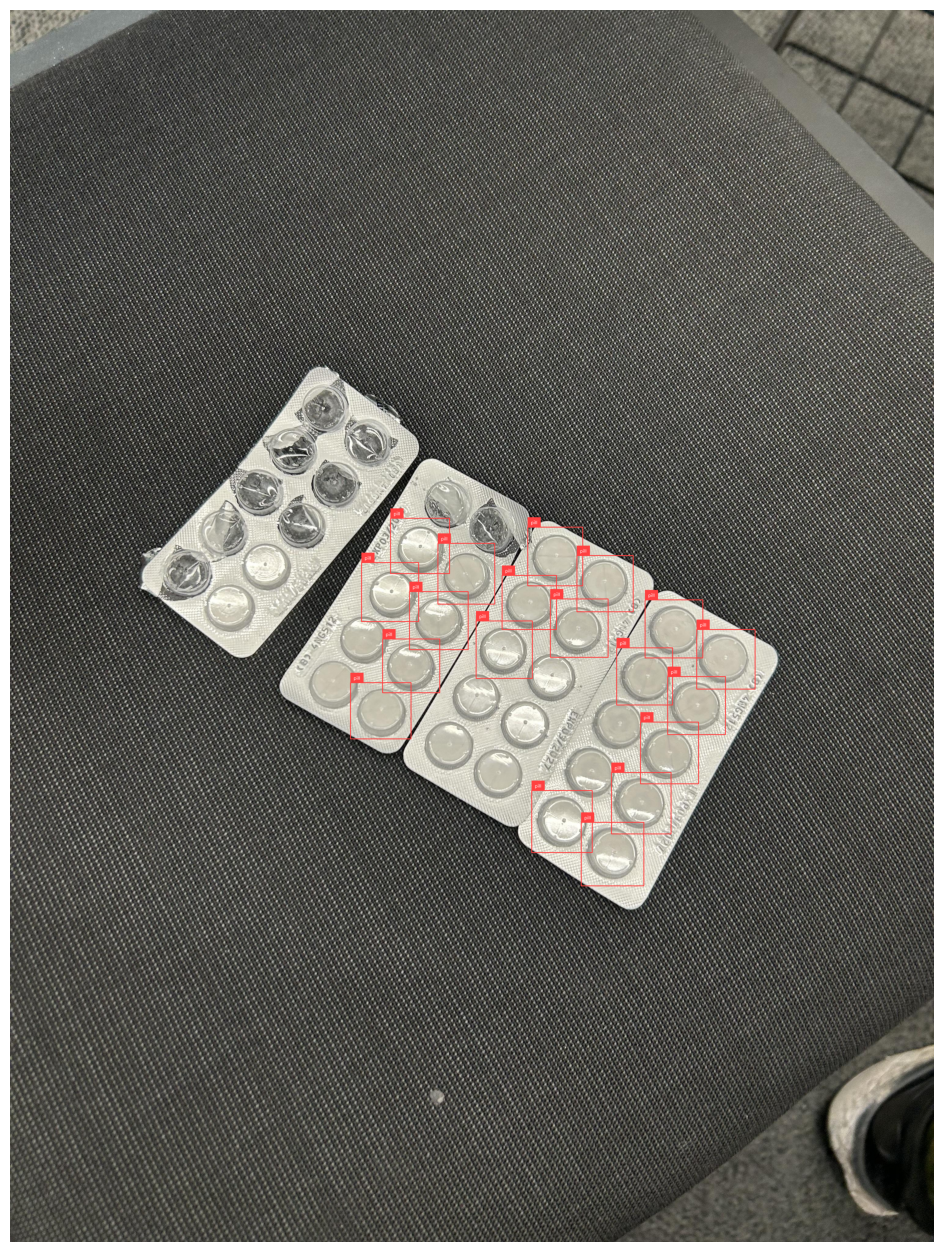

In [5]:


import supervision as sv
import cv2



model = YOLO('pill.pt')

result = model.predict("my_image.jpg")


detections = sv.Detections.from_ultralytics(result[0])

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()


image = cv2.imread("my_image.jpg")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(image=annotated_image, size=(16, 16))

In [4]:
model.names

{0: 'pill'}

In [4]:
# training_dir = Path("training_custom")
# import shutil
# image_destination = training_dir / "training"/ "images"
# label_destination = training_dir / "training" / "labels"
# for f in training_dir.glob("*"):
#     if f.name == '.DS_Store':
#         continue
#     if f.is_dir():
#         continue
#     if f.suffix == ".jpeg":
#         shutil.move(f, image_destination / f.name)
#     elif f.suffix == ".txt":
#         name = f.name.replace(".xml", "")
#         shutil.move(f, label_destination / name)

       